In [135]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
plt.rcParams['figure.figsize'] = 10, 7

In [136]:
results = pd.read_csv('results_N2.csv')

In [137]:
figure_dir = 'figures/Prática N2/'

In [138]:
from scipy.interpolate import interp1d
def getConvergenceData(results, algorithm, test_function):
    df = results[
        (results.algorithm == algorithm) &
        (results.test_function == test_function)
    ]
    num_experiments = df.experiment.max() + 1
    curves = [df[df.experiment == i][['fitness_evaluations', 'best_fitness']].values.T for i in range(num_experiments)]
    x = np.sort(np.unique(np.concatenate([curve[0,:] for curve in curves])))
    interpolators = [
        interp1d(
            x=curve[0, :], 
            y=curve[1, :],
            fill_value="extrapolate"
        ) for curve in curves
    ]
    return x, np.array([f(x) for f in interpolators])

def getBoxplotData(results, algorithm, test_function):
    df = results[
        (results.algorithm == algorithm) &
        (results.test_function == test_function)
    ]
    num_experiments = df.experiment.max() + 1
    fitness_values = np.array([np.min(df[df.experiment == i].best_fitness.values) for i in range(num_experiments)])
    return fitness_values

In [139]:
def filled_curve(x, ys, color=None, marker=None, markevery=None, shadow_alpha=0.1): # input shape (num_experiments, num_iterations)
    mean_line = plt.plot(x, np.mean(ys, axis=0), color=color, marker=marker, markevery=markevery)[0]
    plt.fill_between(x, np.min(ys, axis=0), np.max(ys, axis=0), alpha=shadow_alpha, color=mean_line.get_color())

In [140]:
algorithms = ['PSO', 'ABC', 'FSS']
test_functions = ['Sphere', 'Rastrigin', 'Rosenbrock']

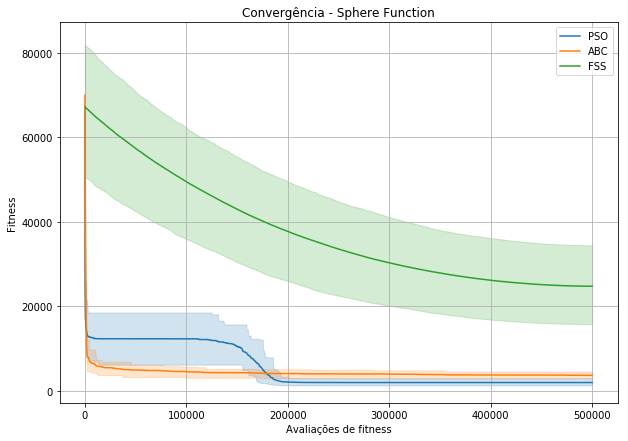

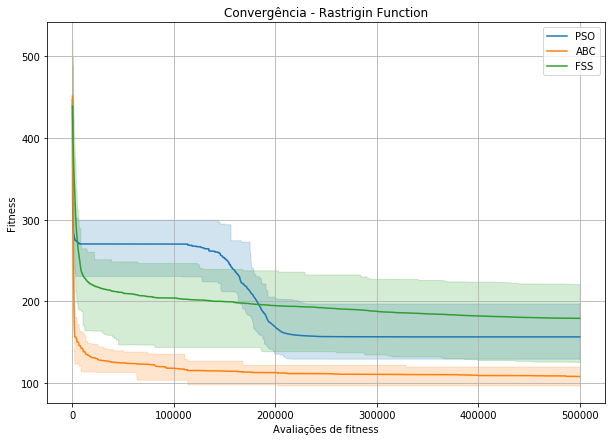

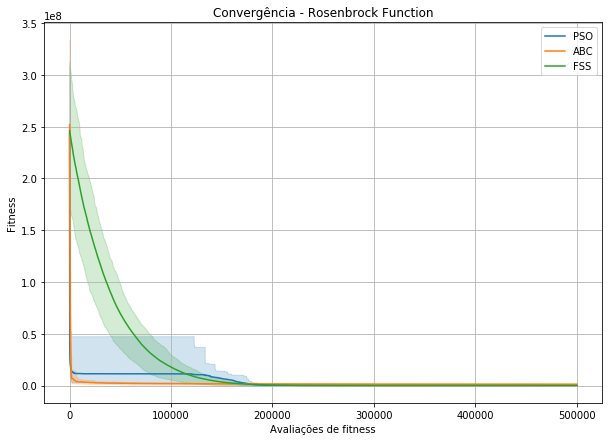

In [141]:
for function_name in test_functions:
    plt.title('Convergência - {} Function'.format(function_name))
    plt.grid()
    for algorithm_name in algorithms:
        x, ys = getConvergenceData(results, algorithm=algorithm_name, test_function=function_name)
        filled_curve(x, ys, shadow_alpha=0.2)
    plt.legend(algorithms, loc='best')
    plt.xlabel('Avaliações de fitness')
    plt.ylabel('Fitness')
    # plt.xlim([-2, 600])
    plt.savefig(os.path.join(figure_dir, 'Convergence - {}.png'.format(function_name)))
    plt.show()

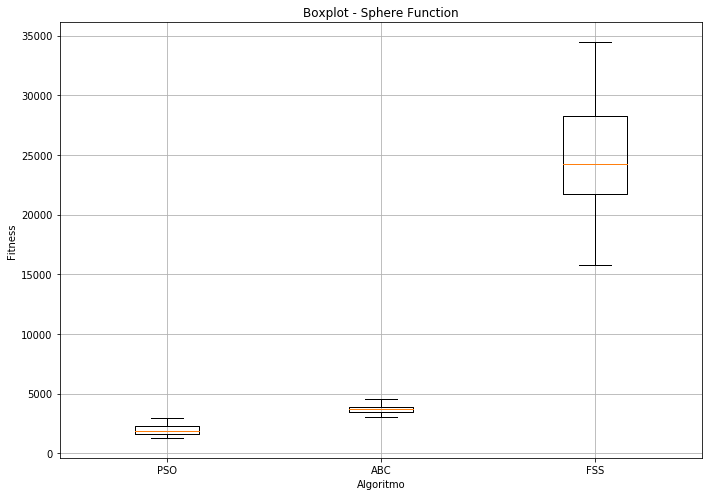

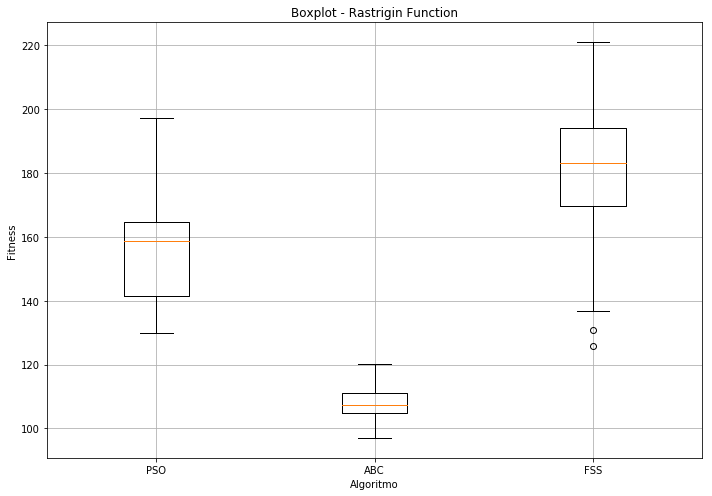

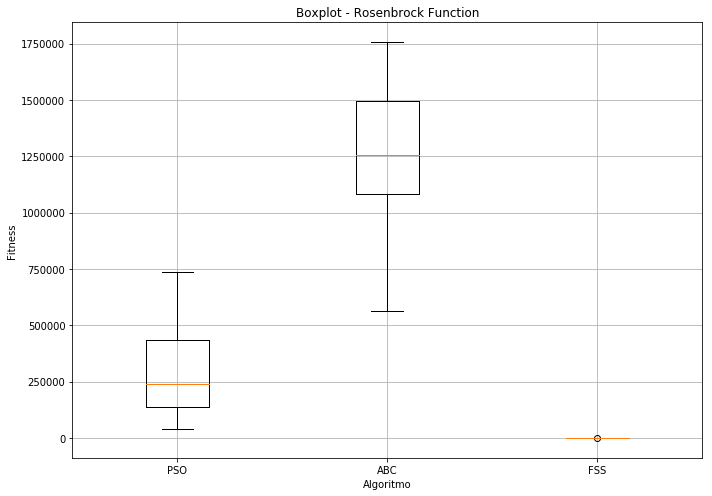

In [142]:
for function_name in test_functions:
    plt.grid()
    plt.title("Boxplot - {} Function".format(function_name))
    plt.boxplot([
        getBoxplotData(
            results,
            algorithm=algorithm_name,
            test_function=function_name
        ) for algorithm_name in algorithms
    ]);
    plt.xticks(range(1,1+len(algorithms)), algorithms)
    plt.xlabel('Algoritmo')
    plt.ylabel('Fitness')
    plt.tight_layout()
    plt.savefig(os.path.join(figure_dir, 'Boxplot - {}.png'.format(function_name)))
    plt.show()